## 선형회귀 분석

#### 상수항 결합

In [1]:
from sklearn.datasets import make_regression
import numpy as np
X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias = 100, noise=10, coef=True, random_state=1)

In [2]:
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [3]:
X = np.hstack([np.ones((X0.shape[0],1)), X0]) ## np.ones 1들을 만들어줌, hstack 행으로 생성
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [4]:
import statsmodels.api as sm ## 상수항을 추가해주는 함수
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

#### OLS(Ordinary Least Squares)

In [5]:
bias = 100
X0, y, coef = make_regression(n_samples=200, n_features=1,
                              bias = bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y),1)

In [6]:
## OLS 해를 직접 이용하는 방법
print(X.shape)
w1 = X.T @X
w2 = np.linalg.inv(w1)
w3 = w2 @ X.T
w4 = w3 @ y
print(w1)
print(w2)
# print(w3)
print(w4)


(200, 2)
[[200.          21.33776297]
 [ 21.33776297 167.91323887]]
[[ 0.00506872 -0.00064411]
 [-0.00064411  0.00603731]]
[[99.79150869]
 [86.96171201]]


In [7]:
# lstsq
w = np.linalg.lstsq(X,y)[0]
print(w)

[[99.79150869]
 [86.96171201]]


C:\Users\ezen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


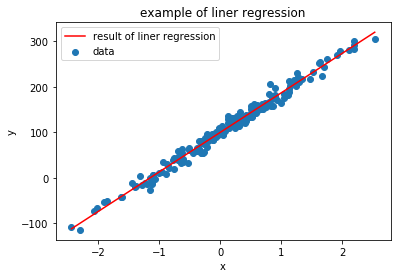

In [8]:
import matplotlib.pylab as plt
%matplotlib inline
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="result of liner regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("example of liner regression")
plt.legend()
plt.show()

#### scikit learn을 이용하여 분석

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [10]:
model = model.fit(X,y)
print(model.coef_, model.intercept_)

[[ 0.         86.96171201]] [99.79150869]


In [11]:
## predict 메서드를 사용하여 출력 데이터 예측

y_new = model.predict(X_new)

print(X_new.shape)
print(y_new.shape)

# plt.scatter(X0, y, label="data")
# plt.plot(x_new, y_new, 'r-', label="result of liner regression")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("example of liner regression")
# plt.legend()
# plt.show()

(100, 2)
(100, 1)


## sklearn에 내장되있는 Boston 집값 데이터를 이용한 실습

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
import pandas as pd
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### 데이터 사전조사

- 데이터에 누락된 값이 있는지 확인
- 각 데이터가 연속적인 실수값인지 범주형 값인지 확인
- 실수형 데이터의 분포가 정규 분포인지 확인
- 실수형 데이터에 양수 혹은 범위 등으로 제한 조건이 있는지 확인
- 범주형 데이터의 경우 범주의 값이 어떤 값 혹은 숫자로 표현되어 있는지 확인
- 데이터간의 상관관계를 확인
- 데이터에 이상한 값(outlier)들이 있는지 확인

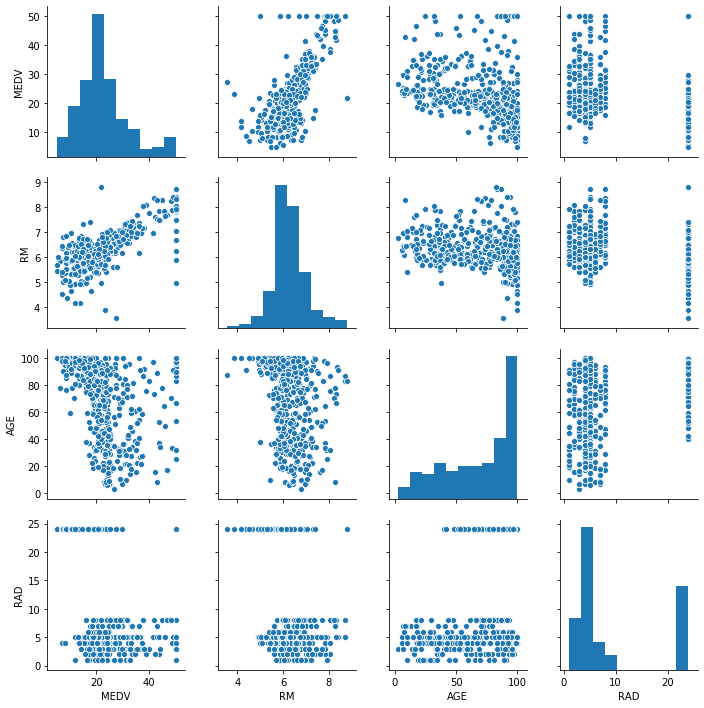

In [14]:
import seaborn as sns
cols = ["MEDV", "RM", "AGE", "RAD"]
sns.pairplot(df[cols])
plt.show()

#### LinearRegression 클래스를 이용하여 회귀분석

In [15]:
model_boston = LinearRegression().fit(boston.data, boston.target)
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

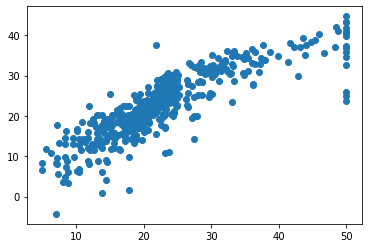

In [17]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.show()

#### evs, mse, r2_score2 를 이용하여 신뢰성 분석

In [18]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

print('explained_variance_score: {}'.format(explained_variance_score(boston.target, predictions)))
print('mean_squared_error: {}'.format(mean_squared_error(boston.target, predictions)))
print('r2_score: {}'.format(r2_score(boston.target, predictions)))

explained_variance_score: 0.7406426641094095
mean_squared_error: 21.894831181729202
r2_score: 0.7406426641094095


#### statsmodels 패키지를 이용한 선형 회귀 분석

In [19]:
## OLS 클래스 객체 생성
import statsmodels.api as sm
model = sm.OLS(y,X)

In [20]:
result = model.fit()

In [21]:
print(result.summary())
y_new = result.predict(x_new)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          8.17e-182
Time:                        16:17:04   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

ValueError: shapes (1,100) and (2,) not aligned: 100 (dim 1) != 2 (dim 0)

In [22]:
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 29 Jan 2020   Prob (F-statistic):                        0.00
Time:                        16:18:29   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------